Воронов Кирилл Михайлович, М8О-407Б-19

# Курсовая работа

## Pima Indians Diabetes

## Диабет индейцев Пима

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import collections
import sklearn
import pickle

In [ ]:
data = pd.read_csv('/content/diabetes.csv')

print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1. Pregnancies - Number of times pregnant (Количество беременностей)
2. Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test (Концентрация глюкозы в плазме крови через 2 часа при пероральном тесте на толерантность к глюкозе)
3. BloodPressure - Diastolic blood pressure (mm Hg) (Диастолическое артериальное давление)
4. SkinThickness - Triceps skin fold thickness (mm) (Толщина кожной складки трицепса)
5. Insulin - 2-Hour serum insulin (mu U/ml) (2-Часовой сывороточный инсулин)
6. BMI - Body mass index (weight in kg/(height in m)^2) (Индекс массы тела)
7. DiabetesPedigree - Diabetes pedigree function (Функция родословной диабета)
8. Age (Возраст)
9. Outcome - Class variable (Наличие диабета)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


Проверим на наличие пустых данных

In [ ]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Пустых данных нет

Удалим дубликаты, если они есть

In [ ]:
data.drop_duplicates(keep='last')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Посмотрим на распределения признаков

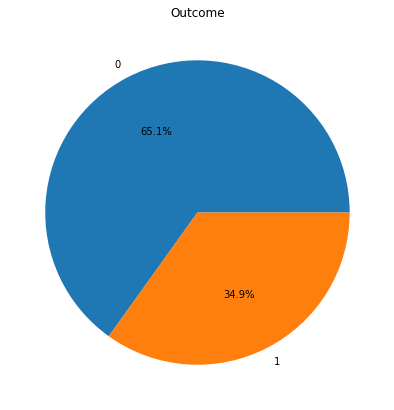

In [ ]:
fig = plt.figure(figsize=(7,7))
plt.pie(data["Outcome"].value_counts(), labels = data["Outcome"].value_counts().index, autopct='%1.1f%%')
plt.title("Outcome")
plt.show()

Сделаем оверсемплинг

Посмотрим на распределения признаков

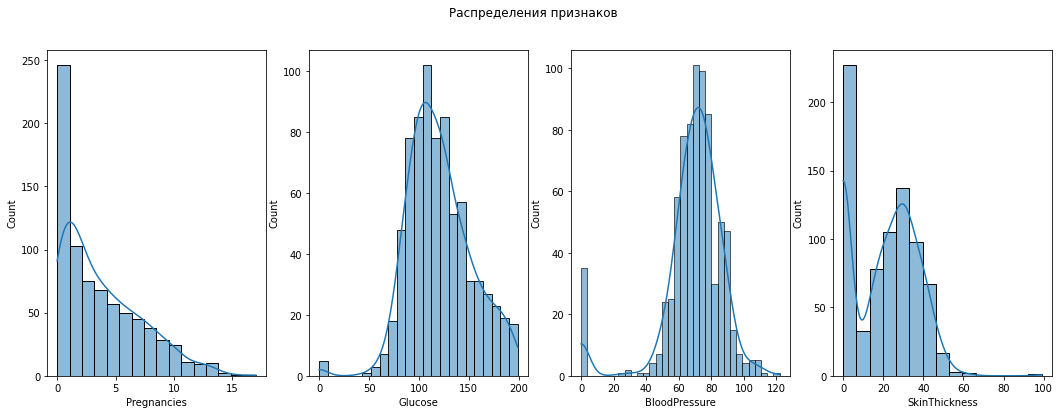

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(18,6))
fig.suptitle('Распределения признаков')
sns.histplot(data['Pregnancies'], ax = ax[0], kde = True)
sns.histplot(data['Glucose'], ax = ax[1], kde = True)
sns.histplot(data['BloodPressure'], ax = ax[2], kde = True)
sns.histplot(data['SkinThickness'], ax = ax[3], kde = True)
None

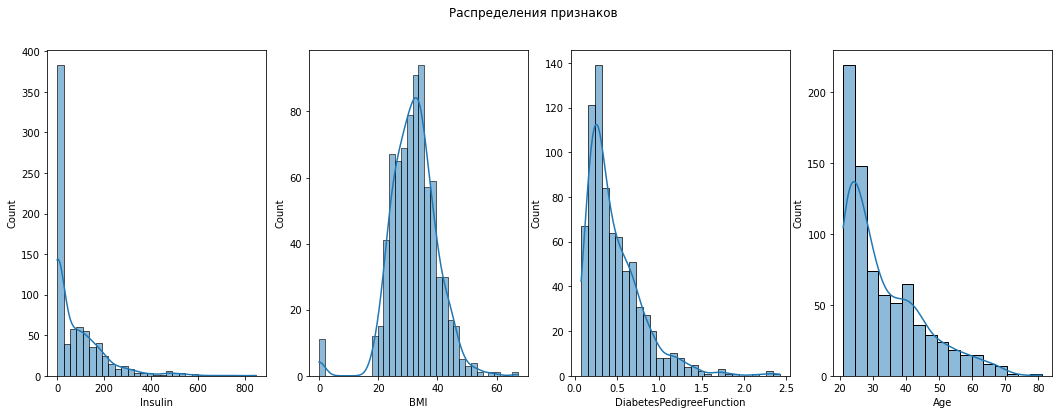

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(18,6))
fig.suptitle('Распределения признаков')
sns.histplot(data['Insulin'], ax = ax[0], kde = True)
sns.histplot(data['BMI'], ax = ax[1], kde = True)
sns.histplot(data['DiabetesPedigreeFunction'], ax = ax[2], kde = True)
sns.histplot(data['Age'], ax = ax[3], kde = True)
None

Как видно, некоторые данные заполнены нулями, что невозможно в жизни. Чтобы не удалять данные, так как их итак мало, заменим нули на средние значения.

In [ ]:
a = data[(data['Glucose'] != 0) & (data['Outcome'] == 1)]['Glucose'].mean()
b = data[(data['Glucose'] != 0) & (data['Outcome'] == 0)]['Glucose'].mean()
for i in range(data.shape[0]):
    if data['Glucose'][i] == 0 and data['Outcome'][i] == 1:
        data.at[i, 'Glucose'] = a
    if data['Glucose'][i] == 0 and data['Outcome'][i] == 0:
        data.at[i, 'Glucose'] = b

a = data[(data['BloodPressure'] != 0) & (data['Outcome'] == 1)]['BloodPressure'].mean()
b = data[(data['BloodPressure'] != 0) & (data['Outcome'] == 0)]['BloodPressure'].mean()
for i in range(data.shape[0]):
    if data['BloodPressure'][i] == 0 and data['Outcome'][i] == 1:
        data.at[i, 'BloodPressure'] = a
    if data['BloodPressure'][i] == 0 and data['Outcome'][i] == 0:
        data.at[i, 'BloodPressure'] = b


a = data[(data['SkinThickness'] != 0) & (data['Outcome'] == 1)]['SkinThickness'].mean()
b = data[(data['SkinThickness'] != 0) & (data['Outcome'] == 0)]['SkinThickness'].mean()
for i in range(data.shape[0]):
    if data['SkinThickness'][i] == 0 and data['Outcome'][i] == 1:
        data.at[i, 'SkinThickness'] = a
    if data['SkinThickness'][i] == 0 and data['Outcome'][i] == 0:
        data.at[i, 'SkinThickness'] = b

a = data[(data['BMI'] != 0) & (data['Outcome'] == 1)]['BMI'].mean()
b = data[(data['BMI'] != 0) & (data['Outcome'] == 0)]['BMI'].mean()
for i in range(data.shape[0]):
    if data['BMI'][i] == 0 and data['Outcome'][i] == 1:
        data.at[i, 'BMI'] = a
    if data['BMI'][i] == 0 and data['Outcome'][i] == 0:
        data.at[i, 'BMI'] = b

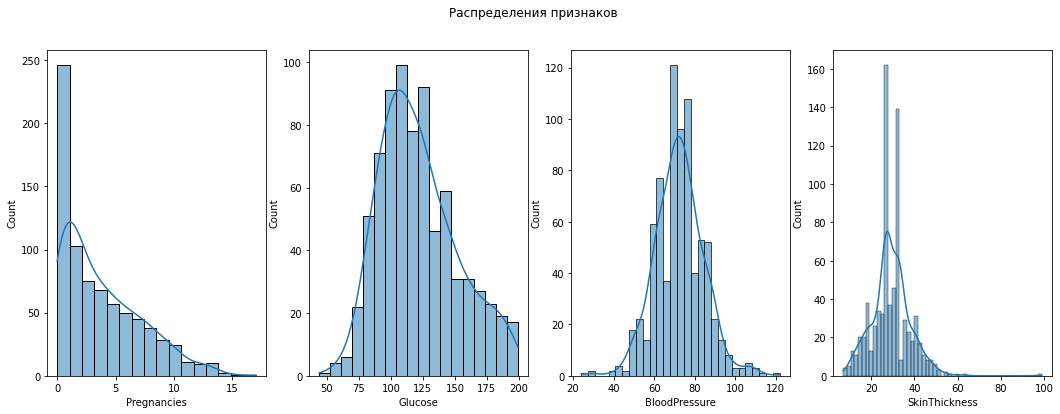

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(18,6))
fig.suptitle('Распределения признаков')
sns.histplot(data['Pregnancies'], ax = ax[0], kde = True)
sns.histplot(data['Glucose'], ax = ax[1], kde = True)
sns.histplot(data['BloodPressure'], ax = ax[2], kde = True)
sns.histplot(data['SkinThickness'], ax = ax[3], kde = True)
None

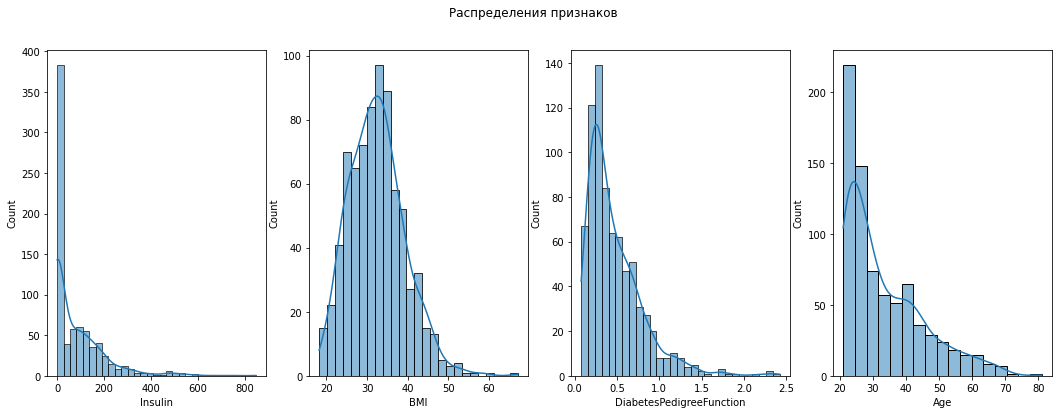

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(18,6))
fig.suptitle('Распределения признаков')
sns.histplot(data['Insulin'], ax = ax[0], kde = True)
sns.histplot(data['BMI'], ax = ax[1], kde = True)
sns.histplot(data['DiabetesPedigreeFunction'], ax = ax[2], kde = True)
sns.histplot(data['Age'], ax = ax[3], kde = True)
None

Теперь все выглядит адекватно

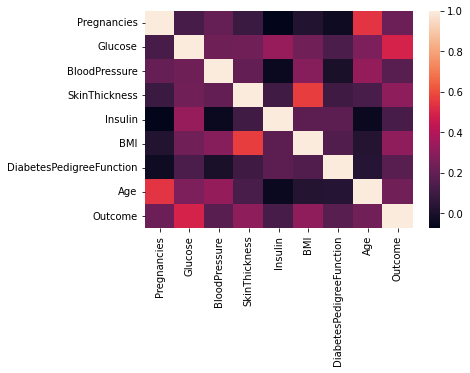

In [ ]:
sns.heatmap(data.corr())
None

Больше всего влияет - Glucose

Меньше всего - Insulin

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,121.694010,72.399740,29.204427,79.799479,32.44642,0.471876,33.240885,0.348958
std,3.369578,30.462388,12.108068,8.933982,115.244002,6.87897,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,0.000000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,30.500000,32.05000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,127.250000,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


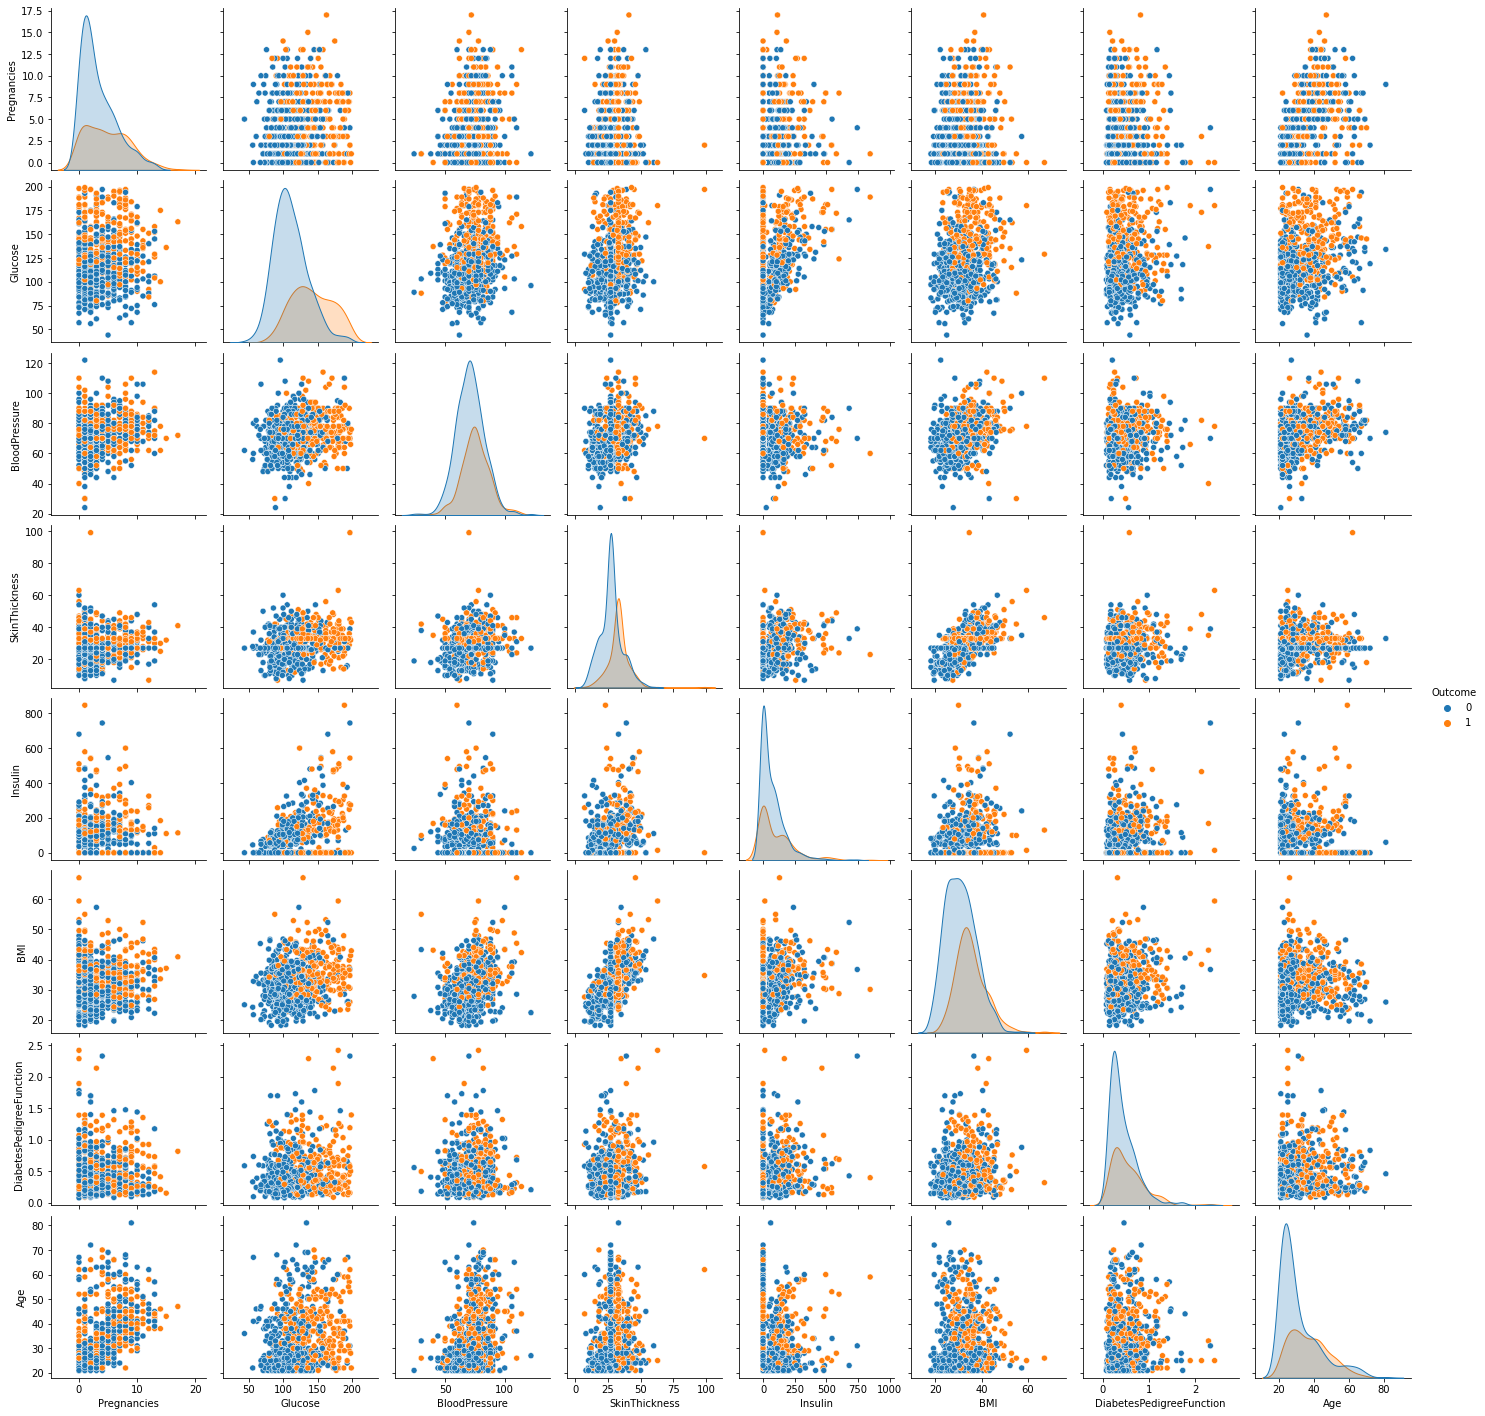

In [ ]:
sns.pairplot(data = data, hue = 'Outcome')
None

### Оверсемплинг путём копирования данных

In [ ]:
sample = data[data['Outcome'] == 1]
while data[data['Outcome'] == 1].shape[0] + sample.shape[0] < data[data['Outcome'] == 0].shape[0]:
    data = pd.concat([data, sample])
data = pd.concat([data, sample.iloc[:data[data['Outcome'] == 0].shape[0] - data[data['Outcome'] == 1].shape[0]]])

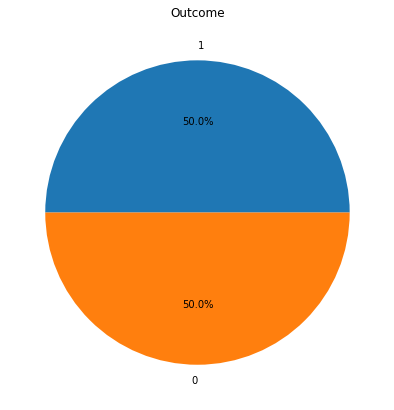

In [ ]:
fig = plt.figure(figsize=(7,7))
plt.pie(data["Outcome"].value_counts(), labels = data["Outcome"].value_counts().index, autopct='%1.1f%%')
plt.title("Outcome")
plt.show()

In [ ]:
data.shape

(1000, 9)

### Разделение данных на тестовые и обучающие

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import max_error
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import SGDClassifier

x = data.drop(columns = 'Outcome')
y = data['Outcome']
x_train, x_test, train_labels, test_labels = train_test_split(x.to_numpy(), y.to_numpy(dtype = np.uint16), test_size = 0.5  , random_state = 33)

### Функция отображение результатов

In [ ]:
def Print_scores(test_labels, x_test_predict):
    print(f"Accuracy tests: {accuracy_score(test_labels, x_test_predict)}")
    matrix = confusion_matrix(test_labels, x_test_predict)
    disp = ConfusionMatrixDisplay(confusion_matrix = matrix)
    disp.plot()
    plt.show()
    print(f"Precision tests: {precision_score(test_labels, x_test_predict)}")
    print(f"Recall tests: {recall_score(test_labels, x_test_predict)}")
    RocCurveDisplay.from_predictions(test_labels, x_test_predict)
    plt.show()

 # KNN

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class KNN(BaseEstimator, ClassifierMixin):
    def __init__(self, k):
        self.k = k
        
    def fit(self, data, labels):
        self.data = data
        self.labels = labels
        
    def euclidean_distance(self, row1, row2):
        distance = 0
        for i in range(len(row1)): 
            distance += (row1[i] - row2[i]) ** 2
        return math.sqrt(distance)
        
    def predict(self, maindata):
        res = np.ndarray((maindata.shape[0],))
        for j, data in enumerate(maindata):
            distances = []
            for i, row in enumerate(self.data):
                distances.append((self.euclidean_distance(data, row), self.labels[i]))
            distances.sort(key = lambda tup: tup[0])
            dictionary = collections.defaultdict(int)
            for i in range(self.k):
                dictionary[distances[i][1]] += 1
            res[j] = max(dictionary.items(), key = lambda tup: tup[1])[0]
        return res

In [ ]:
knn = Pipeline(steps = [('knn', KNN(4))])
print(knn.get_params())

{'memory': None, 'steps': [('knn', KNN(k=4))], 'verbose': False, 'knn': KNN(k=4), 'knn__k': 4}


{'knn__k': 1}
Accuracy train: 0.7779999999999999
Accuracy tests: 0.732


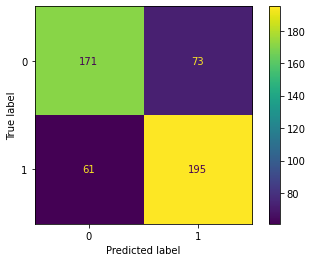

Precision tests: 0.7276119402985075
Recall tests: 0.76171875


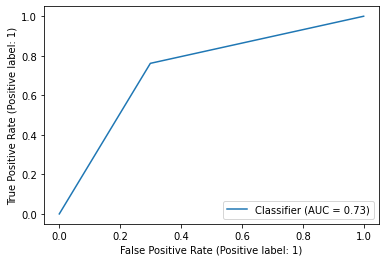

In [ ]:
test = []

for i in range(1, 4):
    test.append(i)

gcv = GridSearchCV(estimator = knn, param_grid={'knn__k': test})
gcv.fit(x_train, train_labels)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
x_test_predict = gcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = Pipeline(steps = [('knn', KNeighborsClassifier(4))])
print(knn.get_params())

{'memory': None, 'steps': [('knn', KNeighborsClassifier(n_neighbors=4))], 'verbose': False, 'knn': KNeighborsClassifier(n_neighbors=4), 'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__metric': 'minkowski', 'knn__metric_params': None, 'knn__n_jobs': None, 'knn__n_neighbors': 4, 'knn__p': 2, 'knn__weights': 'uniform'}


{'knn__n_neighbors': 1}
Accuracy train: 0.7779999999999999
Accuracy tests: 0.732


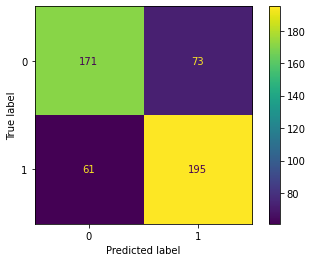

Precision tests: 0.7276119402985075
Recall tests: 0.76171875


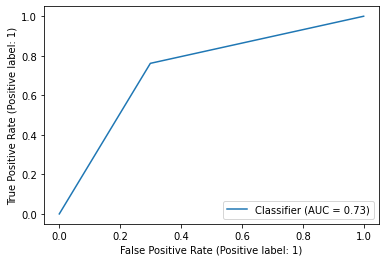

In [ ]:
gcv = GridSearchCV(estimator = knn, param_grid={'knn__n_neighbors': test})
gcv.fit(x_train, train_labels)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
x_test_predict = gcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

# Naive Bayes

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class NaiveBayes(BaseEstimator, ClassifierMixin):
    def __init__(self, bins):
        self.bins = bins
        pass
    
    def fit(self, data, labels):
        self.data = data
        self.labels = labels
        self.classes = []
        for j in np.unique(labels):
            
            self.classes.append([])
            for i in range (data.shape[1]):
                self.classes[j].append([*np.histogram(data[labels == j, i], bins = self.bins)])
                self.classes[j][-1][0] = self.classes[j][-1][0].astype('float64') / len(data[labels == j, i])
        
        self.prclasses = np.unique(labels, return_counts = True)[1] / len(labels)
        
    def predict(self, maindata):
        res = np.ndarray((maindata.shape[0],))
        for j, data in enumerate(maindata):
            maximum = 0
            ans = 0
            for i in range(len(self.classes)):
                p = self.prclasses[i]
                for k in range(len(self.classes[i])):
                    ind = np.digitize(data[k], self.classes[i][k][1])
                    
                    if ind >= len(self.classes[i][k][1]) or ind <= 0:
                        p = 0
                    else:
                        p *= self.classes[i][k][0][ind - 1]
                    
                if p > maximum:
                    maximum = p
                    ans = i
            res[j] = ans
        return res  

In [ ]:
bn = Pipeline(steps = [('normalizer', Normalizer()), ('bn', NaiveBayes(10))])
bn.get_params()

{'memory': None,
 'steps': [('normalizer', Normalizer()), ('bn', NaiveBayes(bins=10))],
 'verbose': False,
 'normalizer': Normalizer(),
 'bn': NaiveBayes(bins=10),
 'normalizer__copy': True,
 'normalizer__norm': 'l2',
 'bn__bins': 10}

{'bn__bins': 38}
Accuracy train: 0.6799999999999999
Accuracy tests: 0.634


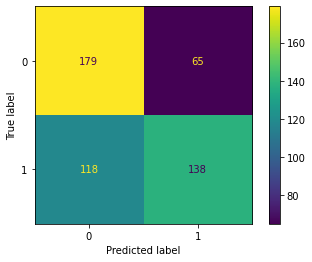

Precision tests: 0.6798029556650246
Recall tests: 0.5390625


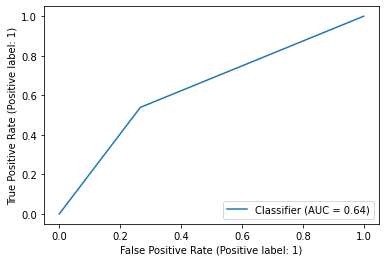

In [ ]:
test = []
for i in range(2, 100):
    test.append(i)

gcv = GridSearchCV(estimator = bn, param_grid={'bn__bins': test})
gcv.fit(x_train, train_labels)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
x_test_predict = gcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class GaussianNaiveBayes(BaseEstimator, ClassifierMixin):
    def __init__(self):
        pass
    
    def fit(self, data, labels):
        self.data = data
        self.labels = labels
        self.mathexp = []
        self.variance = []
        self.classes = []
        self.prob = []
        
        for j in zip(*np.unique(labels, return_counts=True)):
            self.prob.append(j[1] / len(labels))
            self.classes.append(j[0])
            self.mathexp.append(data[labels == j[0],].mean(axis = 0))
            self.variance.append(data[labels == j[0],].var(axis = 0))
        
    def predict(self, maindata):
        res = np.ndarray((maindata.shape[0],))
        for j, data in enumerate(maindata):
            maximum = 0
            ans = 0
            for i in range(len(self.classes)):
                t = np.exp((-1/2) * ((data - self.mathexp[i]) ** 2) / (2 * self.variance[i])) / np.sqrt(2 * np.pi *  self.variance[i])
                t = np.cumprod(t) 
                t[-1] *= self.prob[i]
                if t[-1] > maximum:
                    maximum = t[-1]
                    ans = self.classes[i]
            res[j] = ans
        return res  

Accuracy tests: 0.594


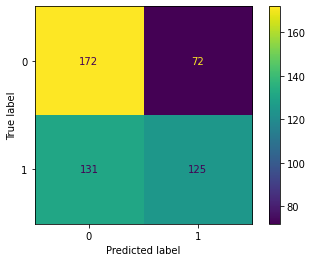

Precision tests: 0.6345177664974619
Recall tests: 0.48828125


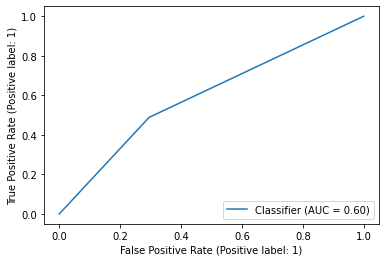

In [ ]:
bn = Pipeline(steps = [('normalizer', Normalizer()), ('bn', GaussianNaiveBayes())])
bn.fit(x_train, train_labels)
x_test_predict = bn.predict(x_test)
Print_scores(test_labels, x_test_predict)

Accuracy tests: 0.58


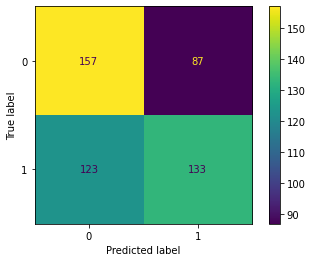

Precision tests: 0.6045454545454545
Recall tests: 0.51953125


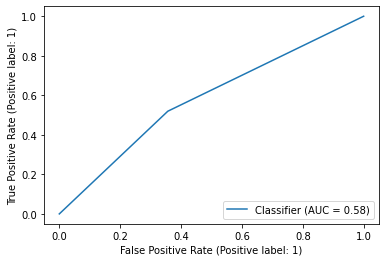

In [ ]:
from sklearn.naive_bayes import GaussianNB

bn = Pipeline(steps = [('normalizer', Normalizer()),('bn', GaussianNB())])
bn.fit(x_train, train_labels)
x_test_predict = bn.predict(x_test)
Print_scores(test_labels, x_test_predict)

# Выводы
КNN хорошо себя показал, дав точность в 77 процентов. Однако наивный Байес сработал не так хорошо, с гистограммой 68 процентов, а с нормальным распределением  еще менье - 59. Это объясняется тем, что распределениях признаков по классам почти совпадают. Данный метод не очень применим на этих данных. 